In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="whitegrid")

### Dataset

**<h3>Coloumn Info<h3>**

ID: Pengidentifikasi unik pelanggan

Year_Birth : Tahun lahir Pelanggan

Pendidikan: Tingkat pendidikan pelanggan

Marital_Status : Status perkawinan pelanggan

Pendapatan: Pendapatan rumah tangga tahunan pelanggan

Kidhome: Jumlah anak di rumah pelanggan

Teenhome: Jumlah remaja di rumah pelanggan

Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan

Keterkinian: Jumlah hari sejak pembelian terakhir pelanggan

Komplain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

**Produk**

MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir

MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir

MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir

MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir

MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir

MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

**Promosi**

NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon

AcceptedCmp1: 1 jika pelanggan menerima tawaran di kampanye pertama, 0 sebaliknya

AcceptedCmp2: 1 jika pelanggan menerima tawaran di kampanye ke-2, 0 sebaliknya

AcceptedCmp3: 1 jika pelanggan menerima tawaran di kampanye ke-3, 0 sebaliknya

AcceptedCmp4: 1 jika pelanggan menerima tawaran di kampanye ke-4, 0 sebaliknya

AcceptedCmp5: 1 jika pelanggan menerima tawaran di kampanye ke-5, 0 sebaliknya

Respons: 1 jika pelanggan menerima tawaran pada kampanye terakhir, 0 sebaliknya

**Tempat**

NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan

NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog

NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko

NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# cek duplicate
df.duplicated().sum()

0

In [7]:
# cek null
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# mean implutation
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [9]:
# change type data Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
print(df.dtypes)

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [10]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

### EDA



1. pendapatan pelanggan
2. komplain (yang koplain itu komplanin apa aja)
3. Produk yang dibeli dalam 2 tahun
4. tempat pembelian di rata rata





In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


 #### Insigth : Income Pelanggan


---



*   Income terkecil pelanggan adalah $ 1730

*   Income terbesar pelanggan adalah $ 666666

*   Rata-rata income pelanggan adalah $ 52247.251354

In [12]:
complain = df['Complain'].value_counts()

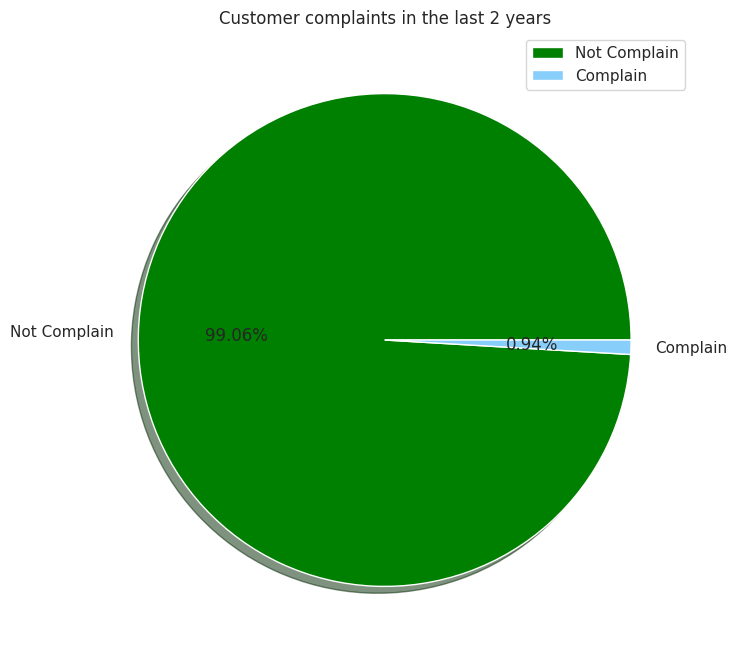

In [13]:
# Complain
labels = ['Not Complain', 'Complain']
size = complain
colors = ['green', 'lightskyblue']
explode = [0, 0]

plt.rcParams['figure.figsize'] = (8,8)
plt.pie(size , colors = colors, labels=labels, explode=explode, shadow=True, autopct= '%.2f%%')
plt.title('Customer complaints in the last 2 years')
plt.axis('off')
plt.legend()
plt.show()

In [14]:
df_complain = df.loc[df['Complain'] == 1]

In [15]:
df_complain

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
78,10401,1976,2n Cycle,Together,26326.0,0,0,2013-09-04,12,1,...,3,0,0,0,0,0,1,3,11,0
147,3120,1981,Graduation,Together,38547.0,1,0,2013-08-28,49,6,...,8,0,0,0,0,0,1,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
271,5726,1983,Master,Single,31788.0,1,0,2014-03-20,15,16,...,5,0,0,0,0,0,1,3,11,0
355,6201,1978,Graduation,Single,38643.0,1,1,2013-11-29,45,22,...,7,0,0,0,0,0,1,3,11,0
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,2,0,0,0,0,0,1,3,11,0
590,3710,1984,PhD,Single,39684.0,1,0,2012-10-12,41,19,...,7,0,0,0,0,0,1,3,11,1
972,10995,1988,2n Cycle,Married,15716.0,1,0,2012-11-12,8,16,...,8,0,0,0,0,0,1,3,11,0
1041,6730,1954,Graduation,Married,38998.0,1,1,2012-11-03,92,34,...,8,0,0,0,0,0,1,3,11,0
1069,2875,1978,Graduation,Married,67023.0,0,0,2014-03-04,93,444,...,2,0,0,0,0,0,1,3,11,0


In [16]:
df_complain.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,21.000000,21.000000,21.000000,21.000000,21.000000,21,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.0,21.000000,21.0,21.0,21.0,21.0,21.0,21.000000
mean,6722.714286,1965.095238,45242.285714,0.666667,0.523810,2013-05-02 14:51:25.714285824,53.047619,169.000000,24.190476,112.476190,...,5.809524,0.095238,0.0,0.047619,0.0,0.0,1.0,3.0,11.0,0.142857
min,255.000000,1900.000000,15716.000000,0.000000,0.000000,2012-09-03 00:00:00,8.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,3.0,11.0,0.000000
25%,4427.000000,1954.000000,36640.000000,0.000000,0.000000,2012-11-12 00:00:00,31.000000,16.000000,1.000000,14.000000,...,5.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,3.0,11.0,0.000000
50%,6742.000000,1964.000000,38998.000000,1.000000,0.000000,2013-01-25 00:00:00,49.000000,34.000000,6.000000,30.000000,...,7.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,3.0,11.0,0.000000
75%,9500.000000,1979.000000,58113.000000,1.000000,1.000000,2013-09-04 00:00:00,77.000000,290.000000,27.000000,169.000000,...,8.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,3.0,11.0,0.000000
max,10995.000000,1995.000000,83257.000000,2.000000,2.000000,2014-03-30 00:00:00,99.000000,629.000000,137.000000,590.000000,...,9.000000,1.000000,0.0,1.000000,0.0,0.0,1.0,3.0,11.0,1.000000
std,3314.618170,20.916273,19223.158027,0.577350,0.601585,NaN,28.522756,208.770209,38.367459,159.926114,...,2.358369,0.300793,0.0,0.218218,0.0,0.0,0.0,0.0,0.0,0.358569


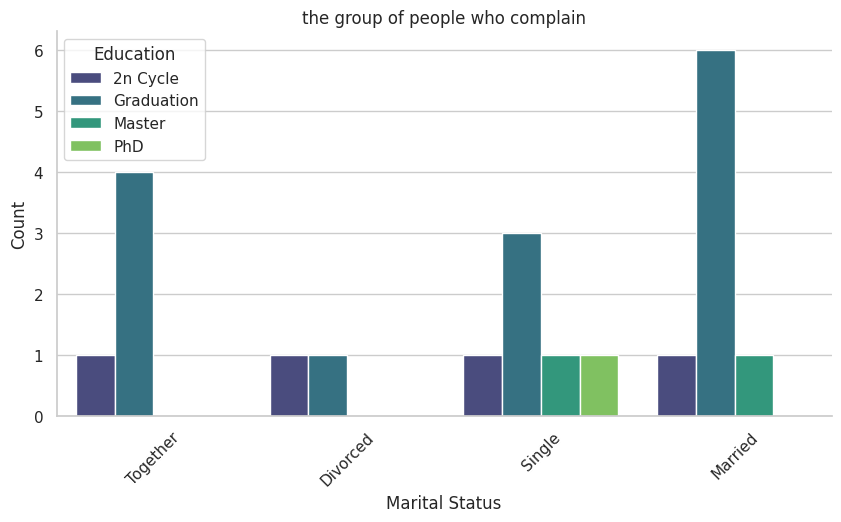

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Marital_Status', data=df_complain,hue='Education', palette='viridis')

ax.set_title('the group of people who complain')

plt.xticks(rotation=45)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')

sns.despine()

plt.show()

#### insigth : Pelanggan yang Complain


---


* Pelanggan yang complain 2 tahun belakangan ini hanya sekitar 0.94% atau 21 orang dari 2240 data yang ada

* Income rata-rata pelanggan yang complain 2 tahun belakangan ini adalah $ 45242.285714 yang dimana income ini di bawah rata-rata semua pelanggan

* Pelanggan yang complain 2 tahun belakangan ini kebanyakan adalah orang yang sudah menikah dan yang baru tamat dari pendidikan, dikarenakan meraka sedang banyak pengeluaran dan kebutuhan meraka sedang banyak mereka tidak ingin mendapatkan barang yang tidak bagus/rusak

In [18]:
df_product = df[['MntWines', 'MntFruits', 'MntFishProducts', 'MntMeatProducts','MntSweetProducts','MntGoldProds']].sum().reset_index()
df_product

,index,0
0,MntWines,680816
1,MntFruits,58917
2,MntFishProducts,84057
3,MntMeatProducts,373968
4,MntSweetProducts,60621
5,MntGoldProds,98609


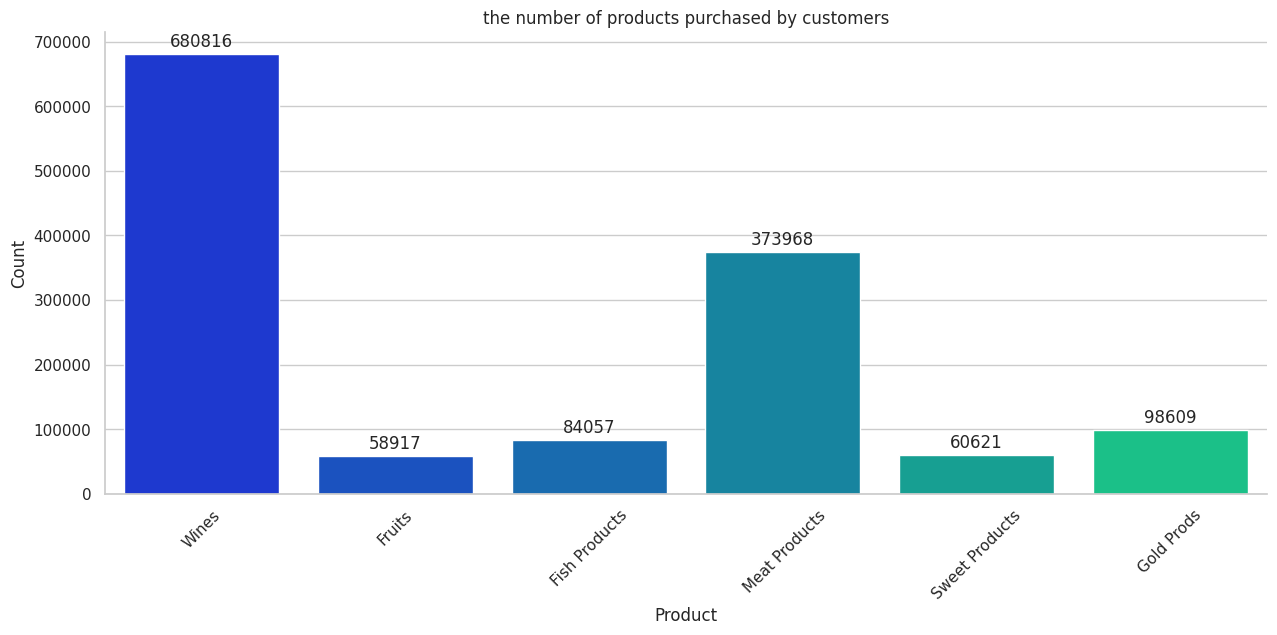

In [19]:
plt.figure(figsize=(15,6))
x = ['Wines', 'Fruits', 'Fish Products', ' Meat Products', 'Sweet Products', 'Gold Prods']
y = 0
ax = sns.barplot(data=df_product,x = x ,y=y ,hue=x,palette='winter')

ax.set_title('the number of products purchased by customers')
ax.set_xlabel('Product')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.xticks(rotation=45)
sns.despine()


plt.show()

#### insigth : Produk yang Dibeli Pelanggan


---



* Pembelian product terbanyak yang dilakukan pelanggan adalah wine dengan total 680.816 dalam 2 tahun terakhir
* Dan pembelian paling sedikit adalah buah-buahan dengan total 58.917
* Dari visualisasi data diatas Pelanggan lebih menyukai daging dari pada ikan
* Product ikan dan Roti kurang diminati Pelanggan

In [20]:
place = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
place

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

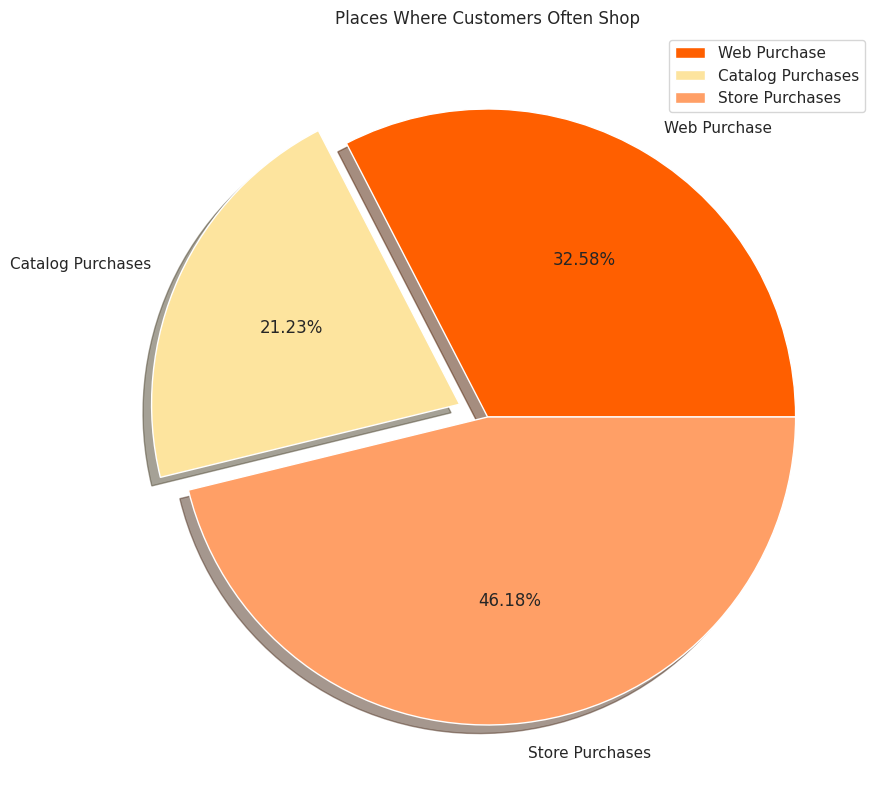

In [21]:
labels = ['Web Purchase ', 'Catalog Purchases', 'Store Purchases']
size = place.values
colors = ['#FF5F00','#FDE49E','#FF9F66']
explode = [0,  0.1, 0]

plt.figure(figsize=(10, 10))
plt.pie(size , colors = colors, labels=labels, explode=explode, shadow=True, autopct= '%.2f%%')
plt.title('Places Where Customers Often Shop')
plt.axis('off')
plt.legend()
plt.show()

In [22]:
df['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [23]:
df2 = df[df['NumWebVisitsMonth'] == 0]
df2[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
164,0,22,0
655,0,0,0
687,0,28,1
905,3,4,10
975,2,8,13
1773,2,7,7
1806,23,1,1
1910,3,5,13
1955,1,8,7
2132,0,0,0


#### insigth : Tempat yang sering pelanggan beli

* Rata-rata pelanggan mengunjungi website hanya 5 kali perbulan,karna menurut visualisasi diatas pelanggan lebih suka datang ke store
* Pelanggan yang belanja di katalog sangat sedikit, karna pelanggan kemungkinan lebih gampang membeli di website dari pada katalog
* Sebulan ada 2 pelanggan yang tidak mengunjungi website dan tidak membeli barang apapun yaitu 655 & 2132
* Dan sebulan ada pelanggan yang mengungjungi website lebih dari 10 kali bahkan sampai 20 kali


